# AIDS dataset: Degeneration effect - repeated avatarization

In order to look at the effect of an avatarization, we repeat the avatarization on an avatar dataset with `k = 20`.  

This notebook displays avatarization results of the AIDS dataset over iterations.  
To visualize the results, we displayed the FAMD projections in the original data space of avatars.

## Packages import 

In [1]:
# Main importation
import pandas as pd
import seaborn as sns
from matplotlib import patches, pyplot as plt
from matplotlib.cm import ScalarMappable
import numpy as np
from matplotlib.patches import Patch
import sys
import saiph

# Imputation function import 
from sklearn.impute import KNNImputer



##  Loading

In [2]:
df = pd.read_csv("../../datasets/AIDS/aids_original_data.csv", sep = ";")
df.drop(columns = "pidnum", inplace = True)

categorical_val = []
continous_val = []
for column in df.columns :
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

df[categorical_val] = df[categorical_val].astype("category")

In [3]:
df_all = pd.read_csv("../../datasets/messageD/aids.csv.tar.bz2")
df_all[categorical_val] = df_all[categorical_val].astype("category")

In [4]:
# select specifics iterations

df_0 = df_all[df_all["iter"] == 0]  # original data
df_1 = df_all[df_all["iter"] == 1]
df_2 = df_all[df_all["iter"] == 2]
df_3 = df_all[df_all["iter"] == 3]
df_5 = df_all[df_all["iter"] == 5]
df_7 = df_all[df_all["iter"] == 7]
df_10 = df_all[df_all["iter"] == 10]

# Impute missing data in order to project the avatars in the multidimensionnal space.
df_0_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_0),
                        columns = df_0.columns.values)
df_0_imp[categorical_val] = df_0_imp[categorical_val].astype("category")
df_1_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_1),
                        columns = df_0.columns.values)
df_1_imp[categorical_val] = df_1_imp[categorical_val].astype("category")
df_2_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_2),
                        columns = df_0.columns.values)
df_2_imp[categorical_val] = df_2_imp[categorical_val].astype("category")
df_3_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_3),
                        columns = df_0.columns.values)
df_3_imp[categorical_val] = df_3_imp[categorical_val].astype("category")
df_5_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_5),
                        columns = df_0.columns.values)
df_5_imp[categorical_val] = df_5_imp[categorical_val].astype("category")
df_7_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_7),
                        columns = df_0.columns.values)
df_7_imp[categorical_val] = df_7_imp[categorical_val].astype("category")
df_10_imp = pd.DataFrame(KNNImputer(n_neighbors = 5).fit_transform(df_10),
                         columns = df_0.columns.values)
df_10_imp[categorical_val] = df_10_imp[categorical_val].astype("category")


## Multdimensionnal projection function.

This section use projection function (such as FAMD) to project the avatar data in the original data space.

In [5]:
palette = sns.light_palette("#02297a", as_cmap=True)

def projection_plot(records_set, avatars_set, variable_visualization, iter, palette = palette, ax = None) :
    """
    Project the avatar dataset as supplemental individuals in the original daataset.
    Can color the individuals with a variable.
    input :
    - records_set : original dataset
    - avatars_set : avatar dataset
    - iter : the iteration number
    - palette : a color palette

    output:
    - ax1 : the projection of the avatar dataset.
    """
    records_set.drop(columns = ['iter'], inplace = True)
    avatars_set.drop(columns = ['iter'], inplace = True)
    
    # add a new fake indivudal in order to fix the plot scale during iteration
    new_ind = [48, 8009.8128, 0, 0, 0, 100, 0, 0, 1, 1500, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    new_ind = pd.Series(new_ind, index = avatars_set.columns)
    avatars_set = avatars_set.append(new_ind, ignore_index = True)

    # perform projection
    __, mod, param = saiph.fit(records_set, nf = 3)
    avat_coordinates = saiph.transform(avatars_set, mod, param) # project avatar in the original space 
    avat_coordinates["Dim. 1"] = - avat_coordinates["Dim. 1"]
    var1 = mod.explained_var_ratio[0] * 100
    var2 = mod.explained_var_ratio[1] * 100

    avat_coordinates["modality"] = avatars_set[variable_visualization]
    ax1 = ax or plt.gca()
    
    # general set up 
    paper_rc = {"lines.markersize": 11}
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale = 2, rc = paper_rc)
    with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]

    ax1.scatter(avat_coordinates["Dim. 1"], avat_coordinates["Dim. 2"],
                         edgecolors = "black", c = avat_coordinates["modality"], s = 75, cmap = palette)
    
    # setup x, y limits, labs and legend
    ax1.set_xlim(avat_coordinates["Dim. 1"].min() - 0.2, avat_coordinates["Dim. 1"].max() + 0.2)
    ax1.set_ylim(avat_coordinates["Dim. 2"].min() - 0.2, avat_coordinates["Dim. 2"].max() + 0.2)
    ax1.set_xlabel("Dim. 1 (" + str(round(var1)) + "%)")
    ax1.set_ylabel("Dim. 2 (" + str(round(var2)) + "%)")
    ax1.set(xlim = (-6, 6))
    ax1.set(ylim = (-6, 6))
    

    
    ax1.set_title("Iteration: {}".format(iter))
    return ax1

## Iterations vizualisation

Here we iterated the visualization over avatar generations.

/var/folders/kc/s79hq4hx3rlfjs7y7_0kn51r0000gn/T/ipykernel_4383/3823880385.py:69: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(sm, ax=axs[:,2], cax=cb_ax)


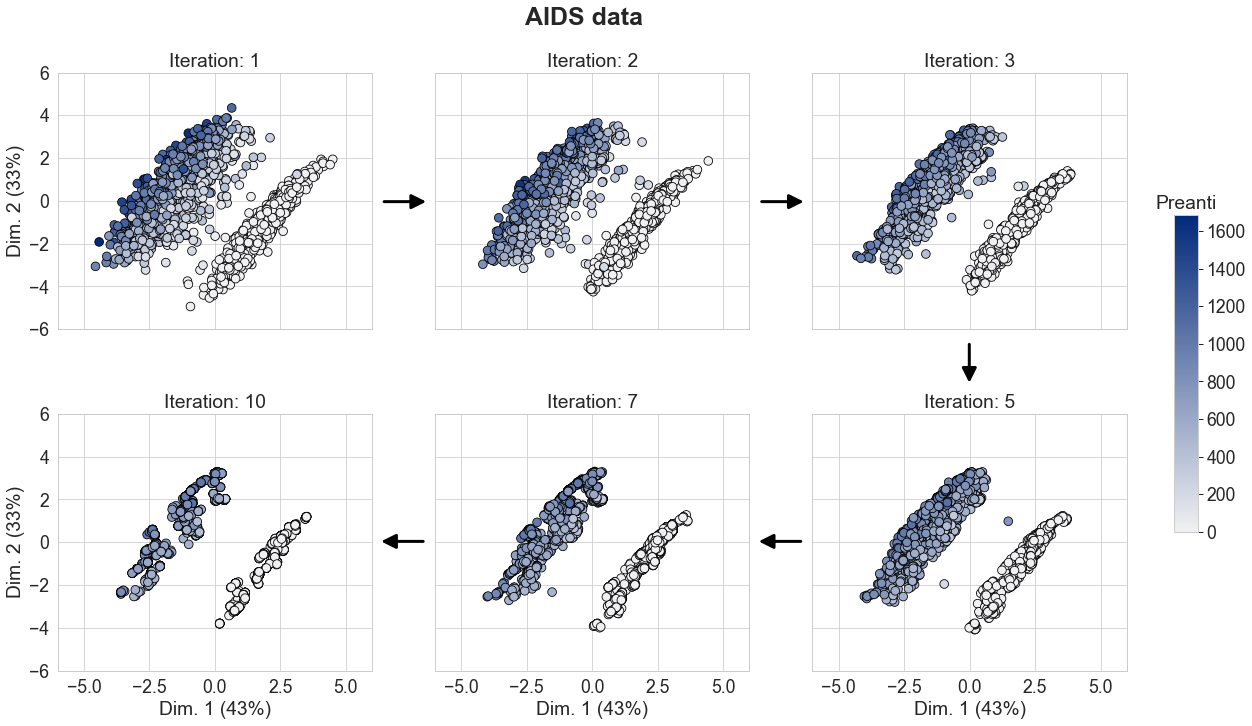

In [6]:
## visualization context
paper_rc = {"lines.markersize": 11}
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 2, rc = paper_rc)
with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]
        
fig, axs = plt.subplots(2, 3, figsize = (22, 11))

# link avatar dataframe to the position in the subplot
list = [(df_1_imp, 1, axs[0, 0]),
        (df_2_imp, 2, axs[0, 1]),
        (df_3_imp, 3, axs[0, 2]),
        (df_5_imp, 5, axs[1, 2]),
        (df_7_imp, 7, axs[1, 1]),
        (df_10_imp, 10, axs[1, 0])]

# make the projection 
for df_temp in list:
    projection_plot(df_0_imp.copy(), df_temp[0].copy(), "preanti", df_temp[1], ax = df_temp[2])


# Add arrow from one subplot to the other
# list all arrow position ([x_start, y_start],[x_end, y_end])
axs_list = [ axs[0, 0],  axs[0, 1],  axs[0, 2],  axs[1, 2],  axs[1, 1],  axs[1, 0]]
xy_list = [([4.85, 0.3], [-8.15, 0.3]), ([3, 0.3], [-10, 0.3]), ([-4.5, -6], [-4.5, 6.7]), 
           ([-10.1, -0.3], [2.9, -0.3]), ([-8.25, -0.3], [4.75, -0.3])]

# Draw all the arrows
for i in range(len(axs_list)-1):
    xyA = xy_list[i][0]
    xyB = xy_list[i][1]
    
    axs_list[i].plot(*xyA)
    axs_list[i+1].plot(*xyB)

    transFigure = fig.transFigure.inverted()
    coord1 = transFigure.transform(axs_list[i].transData.transform(xyA))
    coord2 = transFigure.transform(axs_list[i+1].transData.transform(xyB))
    arrow = patches.FancyArrowPatch(
        coord1,  # posA
        coord2,  # posB
        shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        shrinkB=0,  # so head is exactly on posB (default shrink is 2)
        transform=fig.transFigure,
        color="black",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
    fig.patches.append(arrow)

# add space between each subplot
plt.subplots_adjust(hspace=0.33, wspace=0.2, right=0.8)

# put label outer the axis 
for ax in fig.get_axes():
    ax.label_outer()


# Add preanti color bar legend on the right side
norm = plt.Normalize(df_1_imp['preanti'].min(), df_1_imp['preanti'].max())
sm =  ScalarMappable(norm=norm, cmap=palette)
sm.set_array([])
cb_ax = fig.add_axes([0.83, 0.3, 0.015, 0.4])  # [Left, bottom, width, height]
cbar = fig.colorbar(sm, ax=axs[:,2], cax=cb_ax)
cbar.ax.set_title("Preanti")


# General title
plt.gcf().text(0.42, 0.94, "AIDS data", fontsize=25, weight = 'bold', family = "sans-serif")

# save the fig if needed
# plt.savefig("../../figure/aids_MESSAGED/aids_iterations.svg", format = "svg", bbox_inches='tight')
plt.show()
